In [5]:
#importing the librares
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("Pumpkin_Seeds_Dataset.xlsx - Pumpkin_Seeds_Dataset.csv",sep=",")
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [8]:
df.shape

(2500, 13)

In [9]:
df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

<Axes: xlabel='Area'>

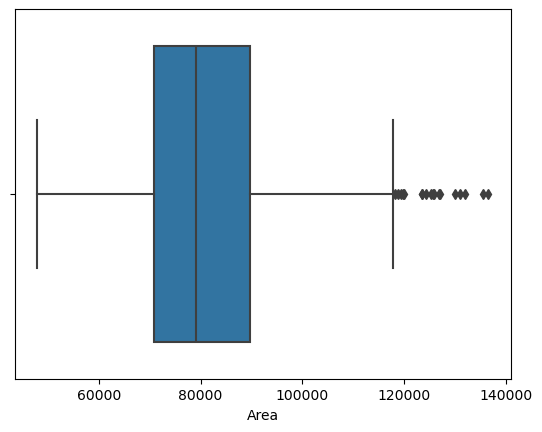

In [10]:
sns.boxplot(x = df['Area'])

In [11]:
# removing the outlier
# calculate the first and third quartiles
Q1 = df["Area"].quantile(0.25)
Q3 = df["Area"].quantile(0.75)

#calculate the interquartile range(IQR)
IQR = Q3 - Q1

#Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#filter out outliers
df = df[(df["Area"] >= lower_bound) & (df["Area"] <= upper_bound)]

<Axes: xlabel='Area'>

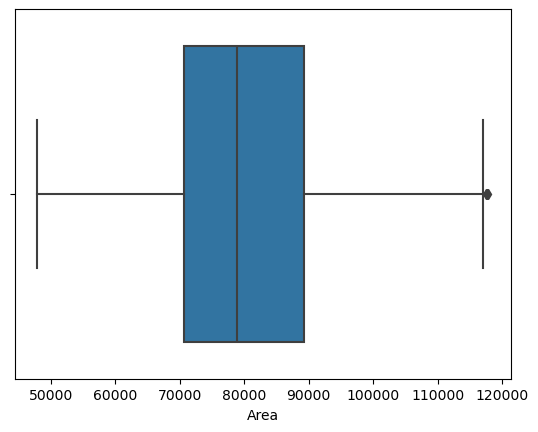

In [12]:
sns.boxplot(x = df['Area'])

In [13]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale= ['Area','Perimeter','Major_Axis_Length']

In [14]:
# Apply MinMaxScaler only to selected columns
scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_36784\924122059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [15]:
# Display the resulting DataFrame
print(df)

          Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0     0.119284   0.033709           0.016192           220.2388        56831   
1     0.410519   0.340661           0.294143           234.2289        77280   
2     0.338866   0.365983           0.351048           211.0457        72663   
3     0.264966   0.210828           0.185370           222.5322        67118   
4     0.259944   0.221228           0.192467           220.4545        67117   
...        ...        ...                ...                ...          ...   
2495  0.453528   0.607791           0.648153           190.4367        80381   
2496  0.310593   0.368254           0.433809           191.8210        70216   
2497  0.573098   0.583228           0.568987           222.1872        88702   
2498  0.458879   0.536535           0.552765           204.7531        80902   
2499  0.529317   0.497268           0.433667           234.5597        85781   

      Equiv_Diameter  Eccentricity  Sol

In [16]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000
mean,0.463459,0.442677,0.411127,225.505553,81179.048751,318.748695,0.860620,0.989479,0.693502,0.791838,2.039858,0.704435
std,0.188186,0.180938,0.167586,23.094748,13249.936542,26.081716,0.045183,0.003499,0.060676,0.055916,0.315819,0.053053
min,0.000000,0.000000,0.000000,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,0.325145,0.307016,0.285968,211.110100,71449.500000,299.953675,0.831525,0.988300,0.659300,0.752325,1.800325,0.663900
50%,0.443448,0.433898,0.391094,224.478400,79802.500000,317.017300,0.863500,0.990300,0.713250,0.798200,1.982850,0.707900
75%,0.592092,0.567014,0.522056,240.022600,90430.250000,337.235300,0.896675,0.991500,0.740275,0.834575,2.258775,0.743700
max,1.000000,1.000000,1.000000,305.818000,118597.000000,387.333300,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


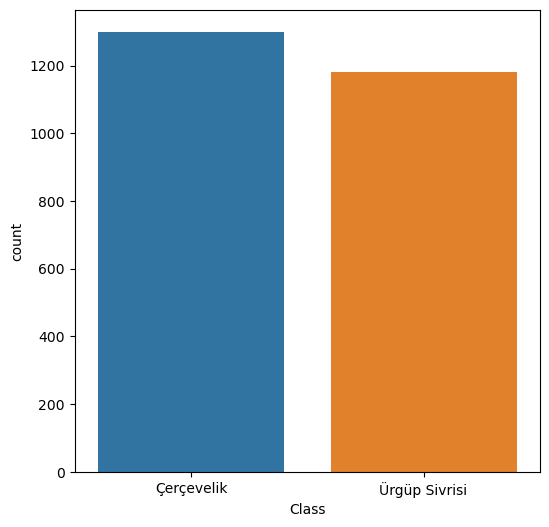

In [17]:
#counting the class values
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='Class')
plt.show()

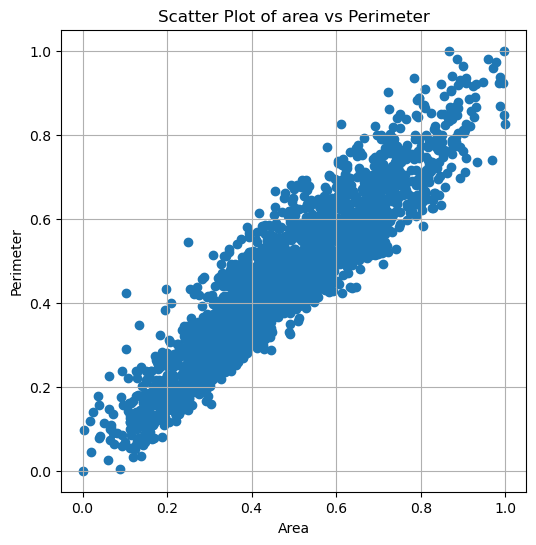

In [18]:
plt.figure(figsize=(6,6))
plt.scatter(df['Area'],df['Perimeter'])
plt.title(f'Scatter Plot of area vs Perimeter')
plt.xlabel("Area")
plt.ylabel("Perimeter")
plt.grid(True)
plt.show()

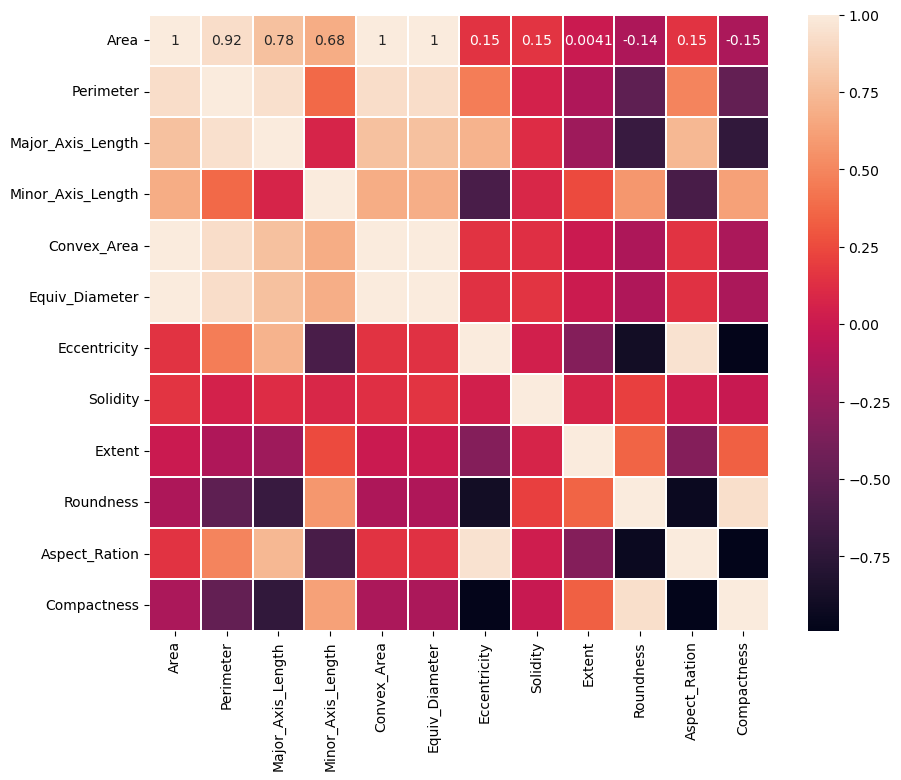

In [19]:
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

In [20]:
#dropping columns
df=df.drop(['Convex_Area','Equiv_Diameter'],axis=1)

In [21]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,0.119284,0.033709,0.016192,220.2388,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,0.410519,0.340661,0.294143,234.2289,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,0.338866,0.365983,0.351048,211.0457,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,0.264966,0.210828,0.185370,222.5322,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,0.259944,0.221228,0.192467,220.4545,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [22]:
#splitting the data into X and Y
X=df.drop('Class',axis = 1)
X

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,0.119284,0.033709,0.016192,220.2388,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207
1,0.410519,0.340661,0.294143,234.2289,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487
2,0.338866,0.365983,0.351048,211.0457,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929
3,0.264966,0.210828,0.185370,222.5322,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624
4,0.259944,0.221228,0.192467,220.4545,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557
...,...,...,...,...,...,...,...,...,...,...
2495,0.453528,0.607791,0.648153,190.4367,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973
2496,0.310593,0.368254,0.433809,191.8210,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433
2497,0.573098,0.583228,0.568987,222.1872,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599
2498,0.458879,0.536535,0.552765,204.7531,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359


In [23]:
Y=df['Class']
Y

0          Çerçevelik
1          Çerçevelik
2          Çerçevelik
3          Çerçevelik
4          Çerçevelik
            ...      
2495    Ürgüp Sivrisi
2496    Ürgüp Sivrisi
2497    Ürgüp Sivrisi
2498    Ürgüp Sivrisi
2499    Ürgüp Sivrisi
Name: Class, Length: 2482, dtype: object

In [24]:
#splitting into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=30)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1985, 10)
(497, 10)
(1985,)
(497,)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [27]:
logistic_regression=LogisticRegression()
logistic_regression.fit(X_train,Y_train)
Y_pred=logistic_regression.predict(X_test)

In [28]:
acc_lr=accuracy_score(Y_test,Y_pred)
c_lr=classification_report(Y_test,Y_pred)

In [29]:
print('Accuracy Score:',acc_lr)
print(c_lr)

Accuracy Score: 0.869215291750503
               precision    recall  f1-score   support

   Çerçevelik       0.85      0.91      0.88       257
Ürgüp Sivrisi       0.89      0.83      0.86       240

     accuracy                           0.87       497
    macro avg       0.87      0.87      0.87       497
 weighted avg       0.87      0.87      0.87       497



In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
random_forest=RandomForestClassifier()
random_forest.fit(X_train,Y_train)
Y_pred=random_forest.predict(X_test)

In [32]:
acc_rf=accuracy_score(Y_test,Y_pred)
c_rf=classification_report(Y_test,Y_pred)

In [33]:
print('Accuracy Score:',acc_rf)
print(c_rf)

Accuracy Score: 0.8752515090543259
               precision    recall  f1-score   support

   Çerçevelik       0.86      0.91      0.88       257
Ürgüp Sivrisi       0.90      0.84      0.87       240

     accuracy                           0.88       497
    macro avg       0.88      0.87      0.87       497
 weighted avg       0.88      0.88      0.87       497



In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
decision_tree_model=DecisionTreeClassifier()
decision_tree_model.fit(X_train,Y_train)
Y_pred=decision_tree_model.predict(X_test)

In [36]:
acc_dt=accuracy_score(Y_test,Y_pred)
c_dt=classification_report(Y_test,Y_pred)

In [37]:
print('Accuracy Score:',acc_dt)
print(c_dt)

Accuracy Score: 0.8289738430583501
               precision    recall  f1-score   support

   Çerçevelik       0.81      0.87      0.84       257
Ürgüp Sivrisi       0.85      0.78      0.82       240

     accuracy                           0.83       497
    macro avg       0.83      0.83      0.83       497
 weighted avg       0.83      0.83      0.83       497



In [38]:
from sklearn.naive_bayes import MultinomialNB

In [39]:
NB=MultinomialNB()
NB.fit(X_train,Y_train)
Y_pred=NB.predict(X_test)

In [40]:
acc_nb=accuracy_score(Y_test,Y_pred)
c_nb=classification_report(Y_test,Y_pred)

In [41]:
print('Accuracy Score:',acc_nb)
print(c_nb)

Accuracy Score: 0.8148893360160966
               precision    recall  f1-score   support

   Çerçevelik       0.75      0.95      0.84       257
Ürgüp Sivrisi       0.93      0.67      0.78       240

     accuracy                           0.81       497
    macro avg       0.84      0.81      0.81       497
 weighted avg       0.84      0.81      0.81       497



In [42]:
from sklearn.svm import SVC

In [43]:
support_vector=SVC()
support_vector.fit(X_train,Y_train)
Y_pred=support_vector.predict(X_test)

In [44]:
acc_svc=accuracy_score(Y_test,Y_pred)
c_svc=classification_report(Y_test,Y_pred)

In [45]:
print('Accuracy Score:',acc_svc)
print(c_svc)

Accuracy Score: 0.6680080482897385
               precision    recall  f1-score   support

   Çerçevelik       0.64      0.80      0.71       257
Ürgüp Sivrisi       0.71      0.53      0.60       240

     accuracy                           0.67       497
    macro avg       0.68      0.66      0.66       497
 weighted avg       0.68      0.67      0.66       497



In [46]:
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
GBC=GradientBoostingClassifier()
GBC.fit(X_train,Y_train)
Y_pred=GBC.predict(X_test)

In [48]:
acc_gbc=accuracy_score(Y_test,Y_pred)
c_gbc=classification_report(Y_test,Y_pred)

In [49]:
print('Accuracy Score:',acc_gbc)
print(c_gbc)

Accuracy Score: 0.8832997987927566
               precision    recall  f1-score   support

   Çerçevelik       0.86      0.92      0.89       257
Ürgüp Sivrisi       0.91      0.85      0.88       240

     accuracy                           0.88       497
    macro avg       0.89      0.88      0.88       497
 weighted avg       0.88      0.88      0.88       497



In [50]:
prediction=random_forest.predict([[	0.410519,0.340661,0.294143,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440]])

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [51]:
prediction[0]

'Ürgüp Sivrisi'

In [52]:
if prediction[0]==0:
  print("Your seed lies in cercevelik class")
elif prediction[0]==1:
  print("Your seed lies in Urgup Sivrisi class")

In [53]:
model = pd.DataFrame({'Model':['Linear Regression','Decision Tree Classifier','RandomForest Classifier',
                              'Multinomial Navie Bayes','Support Vector Classifier', 'Gradient Boost Classifier'],
                     'Score':[acc_lr,acc_dt,acc_rf,acc_nb,acc_svc,acc_gbc],})

In [54]:
model

,Model,Score
0,Linear Regression,0.869215
1,Decision Tree Classifier,0.828974
2,RandomForest Classifier,0.875252
3,Multinomial Navie Bayes,0.814889
4,Support Vector Classifier,0.668008
5,Gradient Boost Classifier,0.883300


In [55]:
import pickle
import warnings
pickle.dump(random_forest,open("model.pkl","wb"))